This notebook is for exploratory data analysis of the data in the paribas kaggle competition. Watch this space!

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
#load data:
train = pd.read_csv("train.csv")
target = train['target']
train = train.drop(['ID','target'],axis=1)
test = pd.read_csv("test.csv")
ids = test['ID'].values
test = test.drop(['ID'],axis=1)

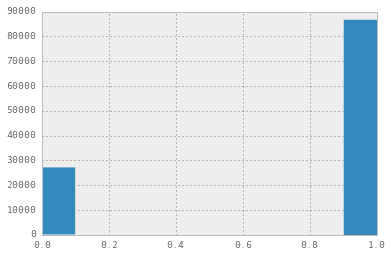

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist( target)
plt.show()

There's a class imbalance! Make sure that your k-fold CV is stratified downstream!

In [11]:
train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


Now divide features into numeric and categorical:

In [15]:
num_feat = train.select_dtypes(include=[np.number])
cat_feat = train.select_dtypes(include=[object])
num_feat.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [16]:
cat_feat.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


Next up: check out predictor variables: missing values, features with near-zero variance, correlated predictors, distributions of numerical features ...

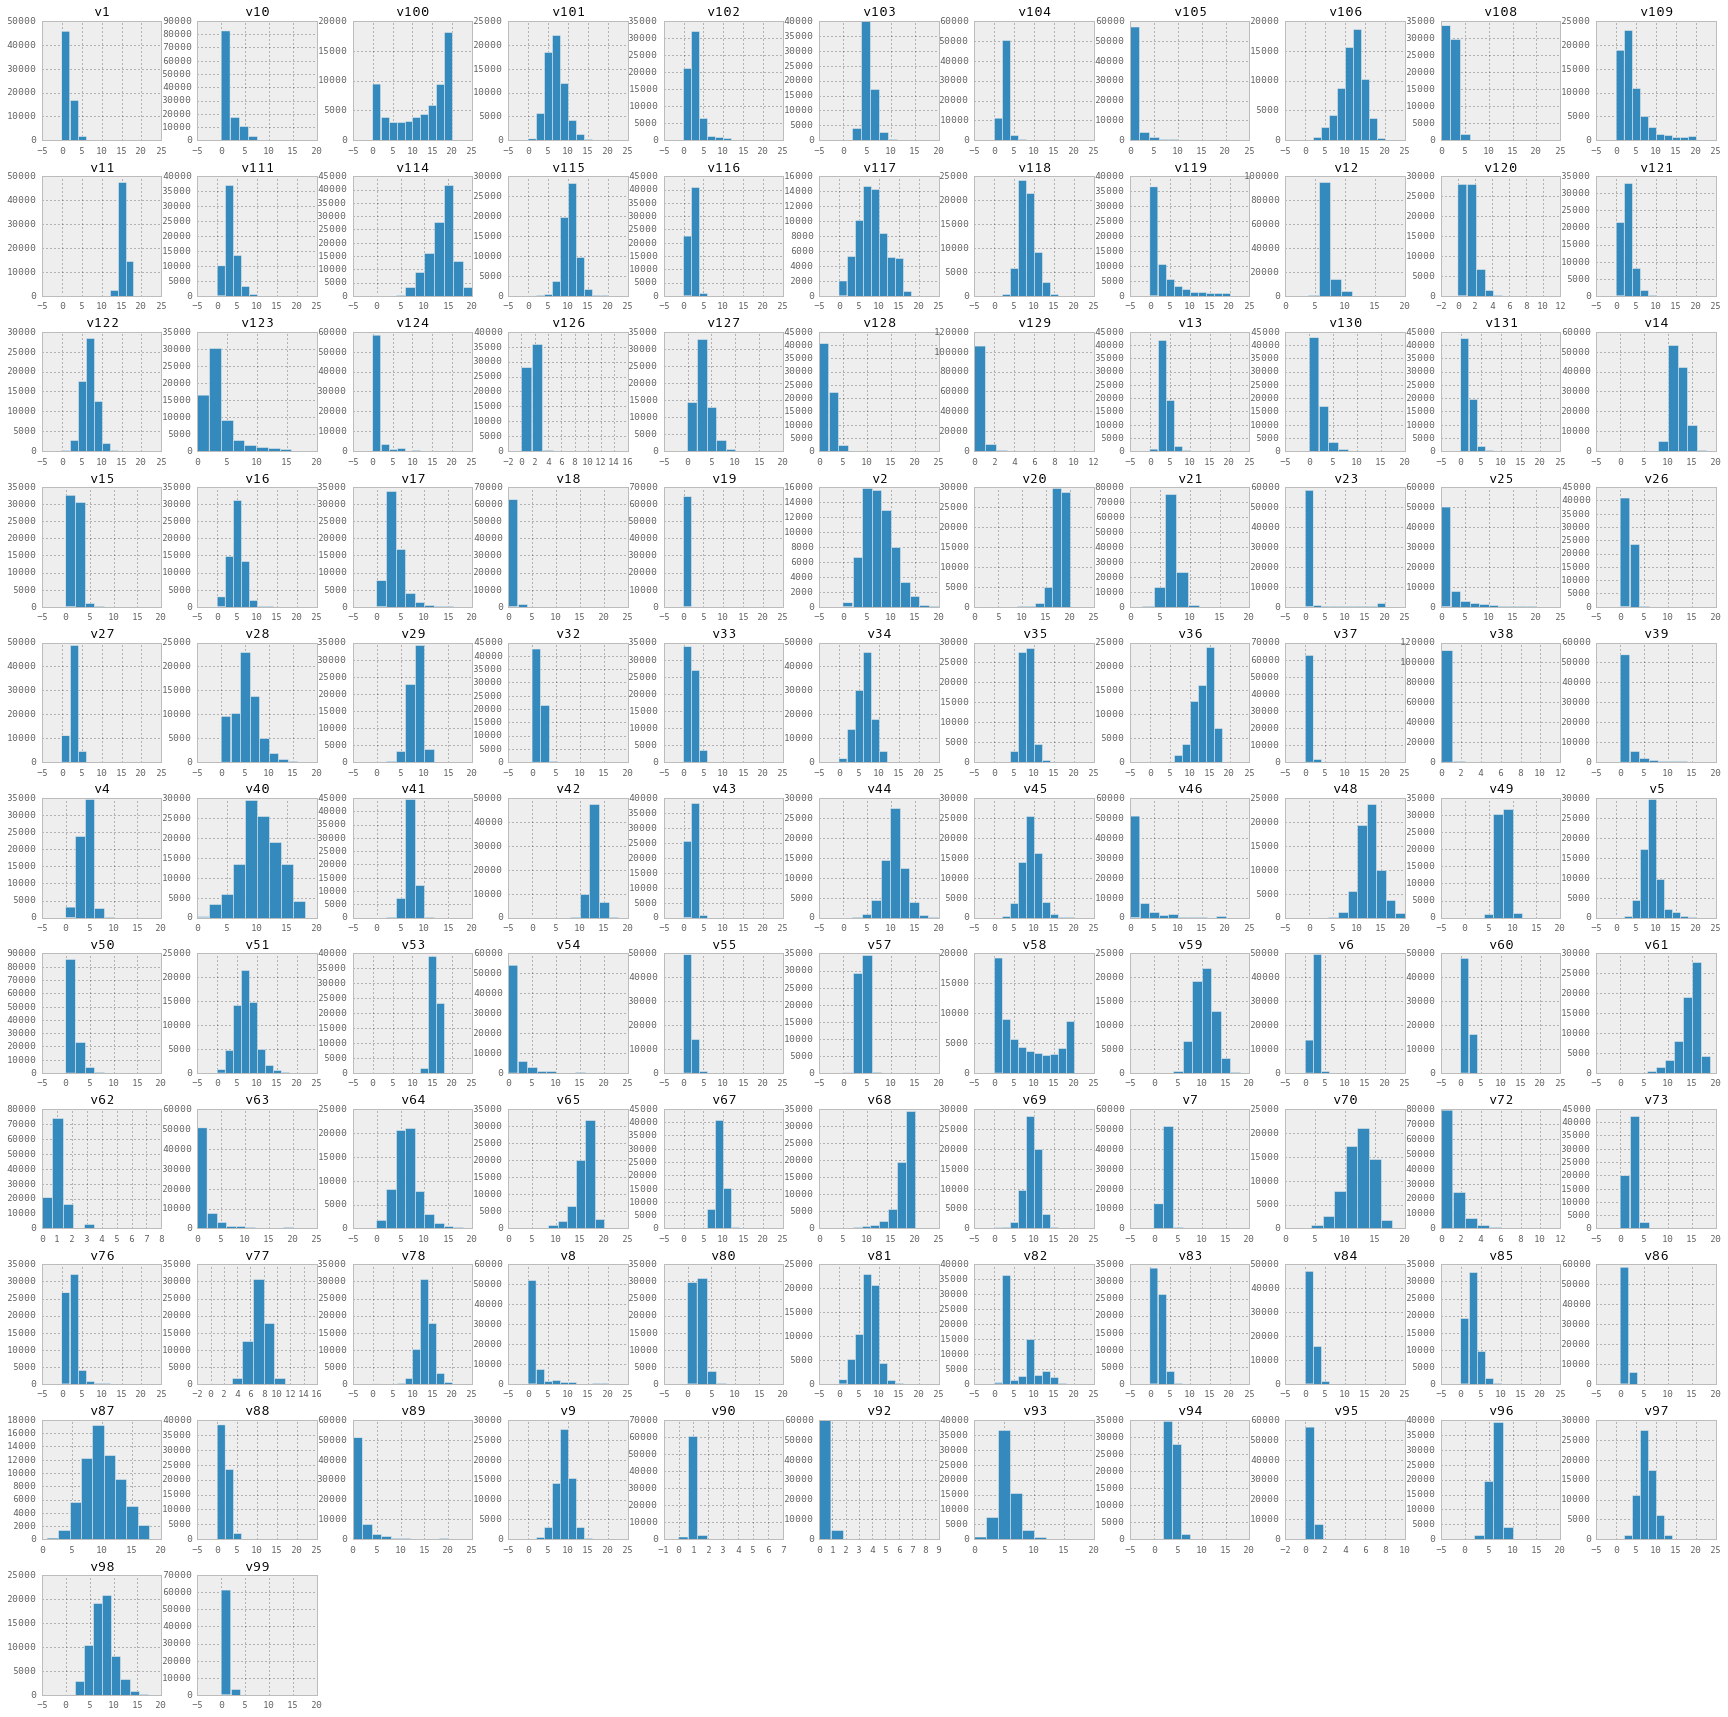

In [21]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
pd.DataFrame.hist(train , figsize=[30,30]);